## Casualty Prediction

Lindy Castellaw 8/18/2022

The goal of this project is the investigate casualty class (Driver or Rider, Pedestrian or Passenger) in accidents in hopes of implementing more safety measures for these classes. The data set has been prepared from manual records of road traffic accident of the year 2017-20 with sensitive information already removed. It has 33 features and 12316 instances of an accident. It also includes weather conditions, type of vehicles, number of casualties and information about them, there are a lot of features in this dataset for analysis. I hope to show casualty traits through visualizations and create an algorithm that can predict the severity of accidents. 


There are some questions that can be answered using this data such as:
- Does lighting affect class of casualty?
- Does gender affect severity?
- What are the age group are most likely to be involved in accidents?
- What are the areas with higher accident severity or lower accident severity?

We will be answering few of the questions as I mentioned above. We will also figure out some way to implement the machine learning on this dataset and see what we can come up with.

In [1]:
# Mathematical functions
import math
from scipy import stats 
# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Missing data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from io import StringIO 

# Categorical data encoding
from sklearn.preprocessing import LabelEncoder

# Train-test split and k-fold cross validation
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


# Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
# Explainable AI
!pip install --quiet shap==0.39.0
import shap

# Warning suppression
import warnings
warnings.filterwarnings('ignore')
import acquire
import prepare 
from functions import split, feature_chi2

Acquire data from csv and run it through the prep_data function. We prepared the df by:

- Fill missing values with the mode of the column
- Grouping outliers
- Encode Categorical columns
- Dropping columns we dont need
- Casualty_class is encoded to 1 - 'Driver or rider', 2 - 'Pedestrian', 3 - 'Passenger'

After preparing the data we are left with 32 columns and 12,316 rows to explore.


In [2]:
get = acquire.get_data()

In [3]:
df = prepare.prep_data(get)
df.head()

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
0,2,4,2,3,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,3,1,3,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
2,2,4,9,3,2,2,1,3,3.0,1,...,0,0,0,0,0,1,0,0,0,1
3,2,1,1,2,2,2,2,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,2,4,2,2,2,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1


### Explore 

First we must split the data to train, validate and test by using the Split function.

In [4]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(df, stratify_by='Casualty_class')
train.head()

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_class,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
10242,2,2,9,3,3,1,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,1
2673,2,1,9,3,1,1,1,2,3.0,1,...,0,0,0,0,0,0,0,0,0,0
5201,2,1,1,3,2,1,2,2,3.0,1,...,0,0,0,0,0,0,1,0,0,0
11438,2,3,9,3,2,1,2,3,3.0,1,...,0,0,0,0,0,0,0,0,0,1
11556,2,1,5,3,2,2,3,2,3.0,1,...,1,0,0,0,0,1,0,0,0,1


Text(0.5, 1.0, 'Age of casualty vs. Class')

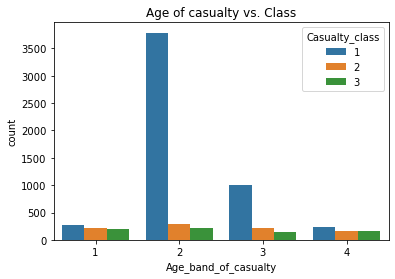

In [5]:
sns.countplot(x="Age_band_of_casualty", data=train, hue="Casualty_class")
plt.title('Age of casualty vs. Class')

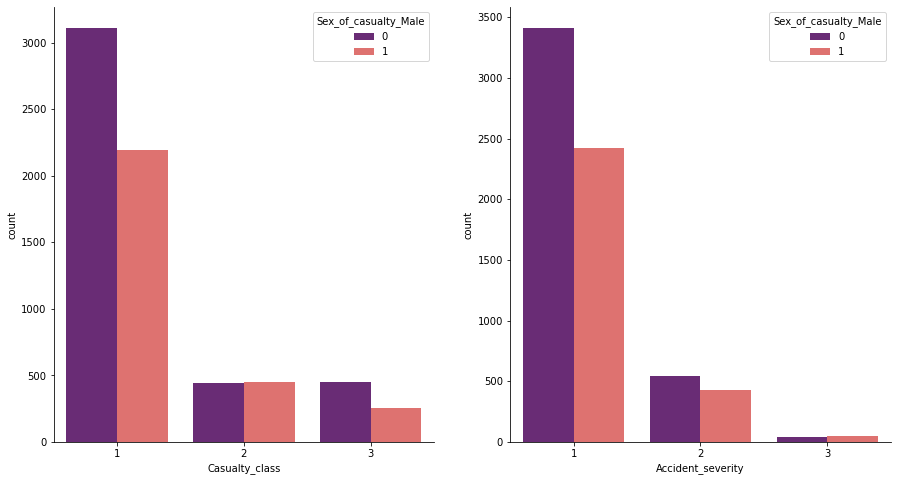

In [6]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("Casualty_class", hue="Sex_of_casualty_Male", 
              palette="magma", data=train, ax=ax[0])

ax2 = sns.countplot("Accident_severity", hue="Sex_of_casualty_Male", 
              palette="magma", data=train, ax=ax[1])

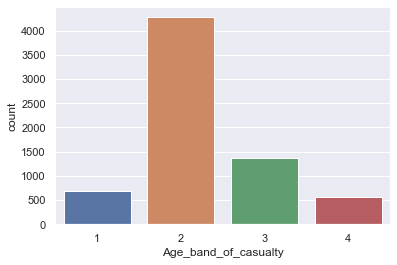

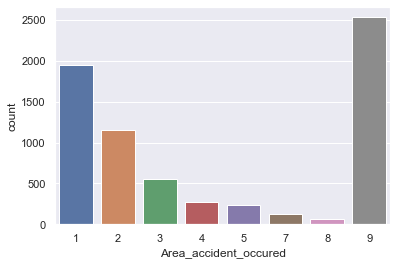

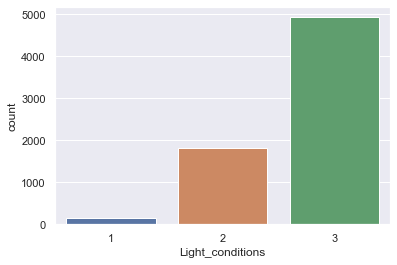

In [7]:
var = ["Age_band_of_casualty","Area_accident_occured", "Light_conditions"]
for v in var:
    sns.set(style="darkgrid")
    sns.countplot(x=v, data=train)
    plt.show()

From these charts we can answer some of our questions. Generally there are more women in the casualty class, especially in driver or rider. The count for women is also higher for accident severity. I can also see that the highest age range for accidents is 18-30. From the last chart 3, which represents daylight, is where most accidents occure. Office Areas and Other have the highest counts out of locations.

## Testing 

Chi2 test on light conditions and casualty class:


 - Ho, light conditions effects casualty class
 - Ha, light conditions do not effect it 

In [8]:
a=train.Casualty_class
b=train.Light_conditions
observed = pd.crosstab(a,b)
chi2, p, degf, expected = stats.chi2_contingency(observed)
alpha = 0.05
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi2 = 4.12
p value: 0.3901
We fail to reject the null hypothesis


Chi2 test on driving experiance 

- Ho, Driving experiance effects casualty class

- Ha, Driving experiance does not effect it

In [9]:
a2=train.Casualty_class
b2=train.Driving_experience
observed2 = pd.crosstab(a2,b2)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
alpha = 0.05
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

chi2 = 17.51
p value: 0.1313
We fail to reject the null hypothesis


One sample T-Test

- Ho, the mean age of casualty <= than the mean age of casualties
- Ha, the mean age of casualty > than the mean age of casualties

In [10]:
alpha = 0.05
churn_sample = train[train.Casualty_class == 1].Age_band_of_casualty
overall_mean = train.Age_band_of_casualty.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)
if p/2 > alpha:
    print("We fail to reject null")
elif t < 0:
    print("We fail to reject null")
else:
    print("We reject null")


-3.9700926840437716 3.63976214667452e-05 0.05
We fail to reject null


We tested Age band of casualty, lighting and driving experiance. We failed to reject the null on all of them, so we will move onto Chi-square feature selection. I wonder if any of the variables in the questions will be selected.

### Feature picking
Now We will use feature selection on train and set K to 25 of the best features to use for modeling. It looks like the features selected all correlate with the questions we asked. X_train_fs will be used going forward. I also made a new dataframe call "Predictions" to hold what our models comeup with, as well as put the baseline in which is .76

In [11]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, y_train, k = 25) # fitting the df to the function 
X_train_fs.head()

,Age_band_of_driver,Driving_experience,Area_accident_occured,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Accident_severity,...,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Sex_of_casualty_Male,Educational_level_Elementary,Educational_level_High School,Educational_level_High school,Educational_level_Junior High
10242,2,2,9,3,3,1,2,3.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2673,2,1,9,3,1,1,2,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
5201,2,1,1,3,2,1,2,3.0,1,1,...,0,0,0,0,0,0,1,0,0,0
11438,2,3,9,3,2,1,3,3.0,1,1,...,0,0,0,0,0,0,0,0,0,1
11556,2,1,5,3,2,2,2,3.0,1,1,...,1,0,0,0,0,1,0,0,0,1


In [12]:
predictions = pd.DataFrame({ #for train
    'actual': train.Casualty_class
})
predictions['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]

pred_Valid = pd.DataFrame({ #for validate 
    'actual': y_validate.Casualty_class
})
pred_Valid['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]
pred_Valid.head()

# df to hold predictions 
pred_Test = pd.DataFrame({ # for test
    'actual': y_test.Casualty_class
})
pred_Test['baseline'] = train[train['Casualty_class'] == 1].shape[0] /train.shape[0]

,actual,baseline
6199,1,0.768997
10283,3,0.768997
3539,3,0.768997
5794,3,0.768997
10043,2,0.768997


### Random Forest 
Max depth 3 on train and validate

In [13]:
# assign model to train
forest1 = RandomForestClassifier(max_depth=3, random_state=123)
#fit model
forest1.fit(X_train_fs, y_train)
y_predictions = forest1.predict(X_train_fs)
predictions['RF'] = forest1.predict(X_train_fs)
# evaluate train accuracy on dt
MSE = mean_squared_error(predictions.actual, predictions.RF)
RMSE = math.sqrt(MSE)
predictions['RF'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.7329856625054239


In [15]:
# RF on valid and get RMSE
pred_Valid['RF_Valid'] = forest1.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.RF_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['RF_Valid'] = RMSE

### Decision Tree 
We will be making two decision trees, the first one  will have a max depth of 3 and the second with 5. Again, testing them both on validate as well.

In [16]:
# call the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)
# fit the model
tree1 = tree1.fit(X_train_fs, y_train)
y_predictions = tree1.predict(X_train_fs)
predictions['DT'] = tree1.predict(X_train_fs)
# evaluate accuracy on dt
MSE = mean_squared_error(predictions.actual, predictions.DT)
RMSE = math.sqrt(MSE)
predictions['DT'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6835403266744803


In [17]:
# dt on valid and get RMSE
pred_Valid['DT_Valid'] = tree1.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.DT_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['DT_Valid'] = RMSE

In [18]:
# call the model
tree2 = DecisionTreeClassifier(max_depth=7, random_state=123)
# fit the model
tree2 = tree1.fit(X_train_fs, y_train)
y_predictions = tree2.predict(X_train_fs)
predictions['DT2'] = tree2.predict(X_train_fs)
# evaluate accuracy on dt2
MSE = mean_squared_error(predictions.actual, predictions.DT2)
RMSE = math.sqrt(MSE)
predictions['DT2'] = RMSE
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6835403266744803


In [21]:
# dt2 on valid and get RMSE
pred_Valid['DT2_Valid'] = tree2.predict(X_validate_fs)
MSE = mean_squared_error(pred_Valid.actual, pred_Valid.DT2_Valid)
RMSE = math.sqrt(MSE)
pred_Valid['DT2_Valid'] = RMSE

In [22]:
pred_Valid.head()

,actual,baseline,RF_Valid,DT_Valid,DT2_Valid
11303,2,0.768997,0.75388,0.724592,0.724592
5288,1,0.768997,0.75388,0.724592,0.724592
9481,1,0.768997,0.75388,0.724592,0.724592
11479,1,0.768997,0.75388,0.724592,0.724592
8266,1,0.768997,0.75388,0.724592,0.724592


### Test
We are using Random forest on test since it did the best on validate,

In [23]:
pred_Test['RF_Test'] = forest1.predict(X_test_fs)
MSE = mean_squared_error(pred_Test.actual, pred_Test.RF_Test)
RMSE = math.sqrt(MSE)
pred_Test['RF_Test'] = RMSE
pred_Test.head()

,actual,baseline,RF_Test
6199,1,0.768997,0.749459
10283,3,0.768997,0.749459
3539,3,0.768997,0.749459
5794,3,0.768997,0.749459
10043,2,0.768997,0.749459


## Conclusion
We can see that even though Random Forst got close on validate, none of the models beat the baseline. Max depth did not seem to change anything between the two decision tree models. From the feature importance plot, we can conclude age, fitness of casulty, light and weather conditions do have an effect on class. The models made would not provide anything useful, besides possibly features for clustering. 
We can take the common sense logic from this data to help educate those who need a reminder.

## Next Steps
I think in order to make useful models we will need more information. Such as more location information, speedlimit, right of ways. Possibly, getting a "Distraction" column that lists if the casualty/Driver had a distraction at the time of the accident. 